<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 6: K Nearest Neighbor(KNN) Regressor </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li>What is KNN?</li>
    <li>What is it used for?</li>
    <li>How does it work?</li>
    <li>Shortcomings of KNN</li>
    
</ul>

<h3>What is KNN?</h3>

K-nearest neighbours is one of the simplest supervised-learning machine learning techniques. 

<h3>What is KNN used for?</h3>

KNN can be used for both <b> Classification</b> and <b>Regression</b> problems. Let me illustrate the main difference with the following simple example:

<ul>
    <li><b>Classification:</b> KNN can be used to predict whether a cadet will pass or fail the TEE for MA477</li>
    <li><b>Regression:</b> KNN can be used to predict the score a cadet will get on the TEE for MA477 </li>
</ul>

<h3>How does KNN work?</h3>

KNN is probably the simplest machine-learning technique both conceptually and from an implementation point of view. As we will shortly see, though KNN is considered a machine-learning technique, the algorithm doesn't really learn anything from the data, that is, it doesn't really extrapolate, it simply reports based on what it observes around.

In what follows we will focus on KNN as a regression model, however, the algorithm works in esssentially the same way for classification problems as well, which we will revisit at a later time.

We will illustrate KNN using the `diamonds` dataset from last lecture. Before we proceed, go ahead and import a few libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
diamonds=sns.load_dataset('diamonds')

In [112]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Go ahead and only select the following three columns is this order: `carat, depth` and `price`, and call the resulting dataframe again `diamonds`.

In [113]:
diamonds=diamonds[['carat','depth','price']]

Check the head of the dataframe:

In [114]:
diamonds.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


 Next, go ahead and randomly select 30 rows from the `diamonds` dataframe, and call the resulting dataframe `diamonds` again.

In [115]:
diamonds=diamonds.iloc[[np.random.randint(100,30000) for i in range(30)]]

Check the head and the shape of the resulting dataframe

In [116]:
diamonds.head()

,carat,depth,price
11943,1.10,63.6,5131
23456,1.53,60.9,11452
7055,0.33,62.7,579
1151,0.87,62.5,2923
11721,0.34,61.8,596


In [117]:
diamonds.shape

(30, 3)

<h4>Goal:</h4> Our goal will be to predict the <b>price</b> of a diamond given that we know the <b>carat</b> and <b>depth</b>.

In other words, if we are provided with a new diamond and the only things we know about it are the <b> carat</b> and the <b> depth</b> then how does KNN decide on the <b>price</b> of the diamond? 

For illustration, suppose that this new sample is given by the red upside-down triangle in the Figure below. So, to rephrase our question above, how does KNN decide what price to associate with the diamond, represented by the red upside-down triangle?

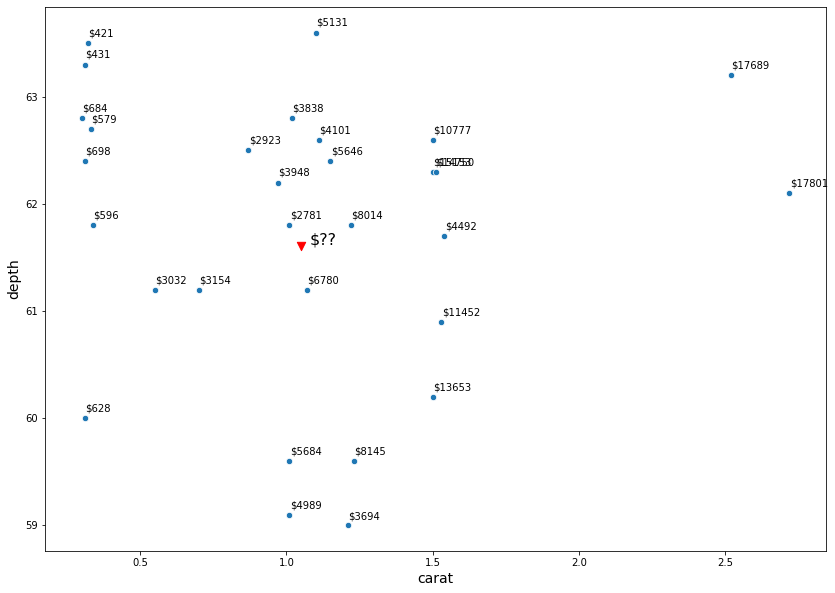

In [149]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=diamonds['carat'],y=diamonds['depth'],s=40)
plt.scatter(1.05,61.61,color='red',marker='v',s=70)
plt.text(1.08,61.62,'$??',fontdict={'size':16})

for i in diamonds.index:
    plt.text(diamonds.loc[i,'carat']*1.001,diamonds.loc[i,'depth']*1.001,
             '${}'.format(diamonds.loc[i,'price']))
plt.xlabel('carat',fontsize=14)
plt.ylabel('depth',fontsize=14)
plt.show()

The simplest version of KNN Regressor may be done in the following steps:

First, pick a number for $K$. This represents the number of the $K$ original data points closest to our new point in red. Then, you can simply average the price value of these $K$ closest points and use that as a prediction for our new data point.

More formally, suppose $x_0$ represents our new data point in red. Let $\mathcal{N}_0$ represent the set of the $K$ training observations that are closest to $x_0$. 

Then, the simplest version of KNN will estimate $f(x_0)$ by averaging all of the training respones in the set $\mathcal{N}_0$; that is $$\widehat{f}(x_0)=\frac{1}{K}\sum_{x_i\in\mathcal{N}_0}y_i$$ where $y_i$ represent the response (price in our case) for all of the data points (diamonds in our example) in the set $\mathcal{N}_0$


<font color='red' size='5'>Example</font>

Let's illustrate this procedure with $K=3$.

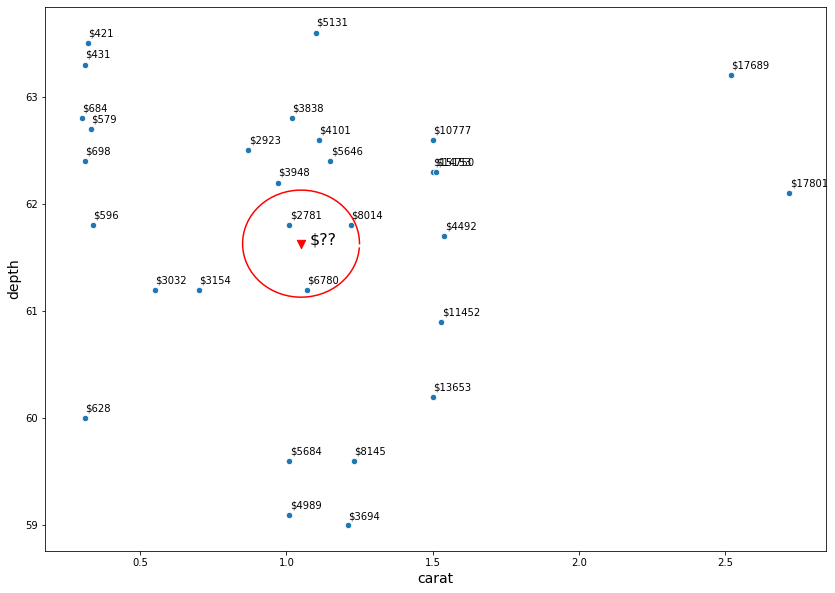

In [198]:
from matplotlib.patches import Circle
plt.figure(figsize=(14,10))
sns.scatterplot(x=diamonds['carat'],y=diamonds['depth'],s=40)
plt.scatter(1.05,61.63,color='red',marker='v',s=70)
plt.text(1.08,61.62,'$??',fontdict={'size':16})

for i in diamonds.index:
    plt.text(diamonds.loc[i,'carat']*1.001,diamonds.loc[i,'depth']*1.001,
             '${}'.format(diamonds.loc[i,'price']))
plt.xlabel('carat',fontsize=14)
plt.ylabel('depth',fontsize=14)

def make_circle(r,h,k):
    t = np.arange(0, np.pi*2, 0.1)
    t = t.reshape((len(t), 1))
    x = 0.4*r * np.cos(t)+h
    y = r * np.sin(t)+k
    return x,y

x,y=make_circle(0.5,1.05,61.63)

plt.plot(x,y,color='r')

plt.show()

The $K=3$ clossest points are circled above. Then, to predict the price for the new diamond, previously unseen by the KNN algorithm, we simply average the prices of these three diamonds inside the circle:

$$\widehat{f}(x_0)=\frac{$2781+$8014+$6780}{3}=$5858.3$$

In other words, if we were deciding for what price to sell this diamond, then based on KNNs recommendations, we would sell it for $\$5858.3$.

KNN is this simple!

A slightly more complex KNN algorithm may be if we estimate $f$ in a more complex way, for example in a way that takes into consideration the relative distance of each of the three closest points etc. You will be asked to explore this idea as part of your first Mini-project. 

<h3>How to pick $K$</h3>

As you can imagine, the performance of the KNN algorithm may heavily depend upon the choice of $K$. To illustrate this point, if in the example above we had picked $K=1$, then $$\widehat{f}(x_0)=\$2781$$ which is quite different from what we got with $K=3$. 

Th optimal value for $K$ depends on the <b>bias-variance</b> trade off,that we talked about a few lessons ago. Specifically, a small values of $K$ results in a very flexible KNN model, so as a result it has high variance and low bias. On the other end, a high value of $K$ has less bias because it uses a larger number of training points to average over when predicting the outcome for a new input, however, it has higher bias, because in essence it is making the assumption that the outcome for a new point depends even on points that may physically be very far appart from it. 

There are a few ways to help us pick the right $K$, but all of them rotate around the idea that you want the $K$ that yeilds the smallest possible error rate. One such method is Cross-Validation, which we will introduce in a few lessons.

<h2>K-NN Regressor with Python</h2>

Throughout this course we will use the very popular <b>Scikit-learn</b> Python library. Scikit-learn is a Machine Learning Python library that features a variety of classification, regression, and clustering algorithms.

To demonstrate how to perform KNN with Python we will use the `diamonds` dataset where we will use all of the quanitative features to predict the price of the diamond. So, go ahead and call in the diamonds dataset again and remove all the qualitative features, and place the target variable, `price`, at the end of the dataframe.

In [277]:
diamonds=sns.load_dataset('diamonds')

In [278]:
diamonds.drop(['cut','clarity','color'],axis=1,inplace=True)

In [279]:
diamonds.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [280]:
diamonds=diamonds.reindex(columns=['carat','depth','table','x','y','z','price'])

In [281]:
diamonds.head()

,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


Because, oftentimes, as is the case in this example, the features are measured in different scales, we typically want to first rescale our data before we apply a ML model. This is of great importance for ML models that rely on computing distances between the data points as part of learning or making predictions. Since, as we explained earlier, KNN relies exclusively on computing the distance between the points, in order to eliminate the false effect that a feature with very large values may have on the performance of the algorithm, we first rescale our data.

There are many ways to rescale the data. What we will most of the time do, is normalize our data to have mean zero and standard deviation one. In doing so, we eliminate any effects that would have come from our features having different units or measured scales. 

So, we start by rescaling our data using the `StandardScaler()` method:

In [282]:
from sklearn.preprocessing import StandardScaler

Before we scale the data, let's split our data into the features and the target/response variable, `price`.

In [283]:
X=diamonds.drop('price',axis=1)
y=diamonds['price']

In [284]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [285]:
scaler=StandardScaler()

In [286]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [287]:
scaled=scaler.transform(X)

If you check `scaled` you will see that the data has been scaled. So what did exactly `StandardScaler` do? For each of the features/columns in the dataframe it computed its mean and standard deviation, respectively. Then, for each column again, it subtracted the mean and divided by its corresponding standard deviation. To make the scaled data look nice, we will put that in a new dataframe

In [288]:
X_sc=pd.DataFrame(scaled,columns=X.columns,index=X.index)

In [289]:
X_sc.head()

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


<h3> Train-Test Split</h3>

When building a ML model, you want to make sure that it is performing well. Specifically, you want your model to be able to make good predictions on the data that it has never seen before. In other words, as you are tuning all the different parameters that go into your model, you want to do that by trying to minimize some kind of test error rate. 

One way to do that is to start by splitting your data into two sets: a training and a test set. As the word implies, the training set will be the one we will use to tune the model and the test set will be the one that we will use to test the performance/power of our model.

So, let's begin by splitting our data into a training and test set:

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3, random_state=101)

In [292]:
X_train.head()

,carat,depth,table,x,y,z
3769,0.468475,-0.383500,-0.652139,0.658652,0.670220,0.611125
23056,1.481118,0.244725,0.690462,1.371823,1.379425,1.404672
33271,-1.008297,1.221964,-0.204605,-1.240167,-1.177215,-1.089333
20222,1.333441,-0.034486,0.690462,1.336164,1.361913,1.333820
10964,0.552862,-1.500344,0.242928,0.890432,0.819065,0.639466


Now we are ready to import the KNN Regressor and fit the model to our data.

In [308]:
from sklearn.neighbors import KNeighborsRegressor

In [321]:
knn_reg=KNeighborsRegressor(n_neighbors=1)

In [322]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Now the model is fit! Yes, it is that simple! The next stage is to test the performance of our model by predicting the price on the test set and then evaluating how it compares to the actual prices (since this is a supervised learning method, we know the target variable)

In [323]:
knn_pred=knn_reg.predict(X_test)

So, the `knn_pred` holds all the predicted prices given the data in the test set. Now our task is to decide how well is our algorithm performing. 

Since this is a regression problem, there are a few ways one can try to determine the quality of our model. First, let's start with some visual ways of just getting an idea of how well our algorithm is doing.

Remember, ideally the predicted prices, stored in `knn_pred` would be identical to the actual prices, stored in `y_test`. This is not likely to happen, but what we can hope for is for these values to be close to one another. So, if we were to plot a scatter plot of `knn_pred` versus `y_test`, if our algorithm did well, they should be close to a line. Let's check it out:

Text(0, 0.5, 'y_test')

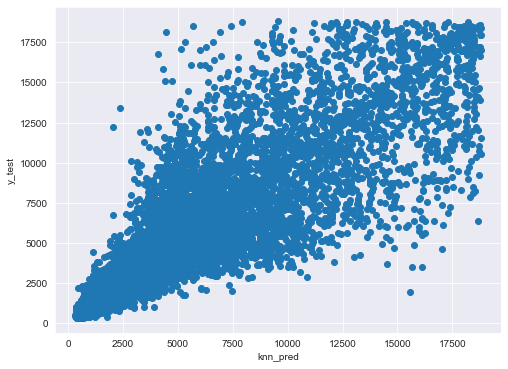

In [324]:
plt.figure(figsize=(8,6))
plt.scatter(knn_pred,y_test)
plt.xlabel('knn_pred')
plt.ylabel('y_test')

So, looking at this picture, it seems like maybe our model is not doing all that great!

Before we move on to tuning our model and trying to increase its performance, let's first discuss a few quantitative metrics we can use to measure the quality of fit. Two such popular metrics are <b> R2 Score($R^2)$</b> and <b>MSE</b>.

Let's just breifly recall what each is:

$$R^2=\frac{SS_{tot}-SS_{res}}{SS_{tot}}=1-\frac{SS_{res}}{SS_{tot}}$$

where $$SS_{tot}=\sum (y_i-\bar{y})^2$$

$$SS_{res}=\sum(y_i-\widehat{f}(x_i))^2$$

$SS_{tot}$ represents the total amount of variability in the dat.

$SS_{res}$ represents the amount of the variability in the data that is unaccounted for after performing the regression.

So, in words, $R^2$ represents the amount of the explained variance in the response variable that has been accounted for. There is no rule as to what exactly this number should be, but the closer to one the better. 

On the other hand $$MSE=\frac{1}{n}\sum(y_i-\widehat{y_i})^2$$

In [298]:
from sklearn.metrics import r2_score, mean_squared_error

In [299]:
knn_r2=r2_score(y_test,knn_pred)
mse=mean_squared_error(y_test,knn_pred)

In [300]:
knn_r2

0.7899285736427814

In [272]:
mse

3419853.865714992

So, what this means is that about $78.9%$ of the variability in the price has been accounted for. This is not too bad, but can we do better? Interpreting the test MSE can be harder, but you want as small of a value as possible. 

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<font color='red' size='5'> Exercise</font>

Tune the parameters to increase the prediction power of the model.

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

We can start by picking different values of $K$. But instead of doing it one by one, let's loop over a few values for $K$ and store the $R^2$ score for each value and then we can pick the $K$ that results in highest r2 score.

In [306]:
knn_r2scores=[]

for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    r2=r2_score(y_test,pred)
    knn_r2scores.append(r2)

Text(0, 0.5, 'R2 Score')

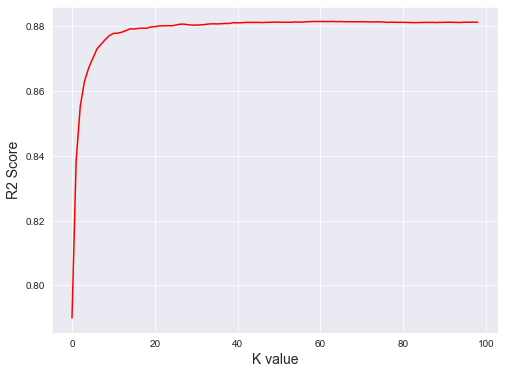

In [307]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(knn_r2scores,c='r')
plt.xlabel("K value",fontsize=14)
plt.ylabel("R2 Score",fontsize=14)

As we can see from the grph above, there is no significant increase in the performance of the model for $K$ values larger than $20$. So, for practical purposes we would build a KNN Regressor with an optimal value of $K=20$. For this case we are getting an $R^2=.88$. In this case, I would consider this a relatively good model.

<font size='5' color='red'>Exercise</font>

Manipulate other parameters such as `weights, metric ` etc. and see if you can beat the current performance. 